# Study of Probleam and Model decision  
Estimation of loan approval based on persons personal attributes  
Models Probleam is calssification  
Performance Measures are AUC & ROC(False Negatives, False Positives, Precision, Recall, threshold, Confusion Matrix), Balance Accurancy  
Useful Models include logistic Regression, Random Forest, SVM and KNN 

In [116]:
# Importing required framework libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import required DataPipeLine libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Import processing and evaluation libraries
import scipy.stats as stats #for qq plots
from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, confusion_matrix, classification_report

# Import Model libraries
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
#from lightgbm import LGBMClassifier #Light Gradient Boosting Machine based on Decision Tree

In [82]:
# Read the Data
df = pd.read_csv('credit_risk_dataset.csv')
print(">>Shape of Original Data: ",df.shape)
df.head(5)

>>Shape of Original Data:  (32581, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [83]:
## Description of the DataSet
print("Raw DataSet Stats are:",)
display(df.describe())

## Check for any duplicate entries in the dataset
print(">>Number of Duplicate entries in the dataset: ",len(df[df.duplicated()]), "\n")

## Check for Sample and count of Unique values
for col in df:
    print(">>Unique values in a column ",col, '--->', df[col].nunique())
    print("dtype of column ",col, '--->', df[col].dtype)
    if df[col].nunique()<20:
        print(df[col].value_counts(normalize=True)*100)
    print()

Raw DataSet Stats are:


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


>>Number of Duplicate entries in the dataset:  165 

>>Unique values in a column  person_age ---> 58
dtype of column  person_age ---> int64

>>Unique values in a column  person_income ---> 4295
dtype of column  person_income ---> int64

>>Unique values in a column  person_home_ownership ---> 4
dtype of column  person_home_ownership ---> object
RENT        50.477272
MORTGAGE    41.263313
OWN          7.931003
OTHER        0.328412
Name: person_home_ownership, dtype: float64

>>Unique values in a column  person_emp_length ---> 36
dtype of column  person_emp_length ---> float64

>>Unique values in a column  loan_intent ---> 6
dtype of column  loan_intent ---> object
EDUCATION            19.806022
MEDICAL              18.633559
VENTURE              17.553175
PERSONAL             16.945459
DEBTCONSOLIDATION    15.997053
HOMEIMPROVEMENT      11.064731
Name: loan_intent, dtype: float64

>>Unique values in a column  loan_grade ---> 7
dtype of column  loan_grade ---> object
A    33.077561
B    

## Elimination of empty Target Data

In [84]:
## Handeling missing values in Target via droping the null rows for loan_status column
df = df[df['loan_status'].notnull()]

# 

# Train Test split  
use stratify and shuffel for preserving and proper distribution of data  

In [85]:
# Train Test split of Data for generalised error with stratify and shuffel to maintain the distribution quality
X, X_test, y, y_test = train_test_split(df.drop('loan_status', axis=1), df['loan_status'],
                                        random_state=0,  test_size=0.2, stratify=df['loan_status'],
                                        shuffle=True)

In [86]:
# Check Splits for Distributions in the Train and Test Data with Respect to Original data
print("Normalized df data: \n",df['loan_status'].value_counts(normalize=True))
print("Normalized Train Split: \n",y.value_counts(normalize=True))
print("Normalized Train Split: \n",y_test.value_counts(normalize=True))

Normalized df data: 
 0    0.781836
1    0.218164
Name: loan_status, dtype: float64
Normalized Train Split: 
 0    0.781845
1    0.218155
Name: loan_status, dtype: float64
Normalized Train Split: 
 0    0.781801
1    0.218199
Name: loan_status, dtype: float64


## Use lable encdoing to encode values in the target if neccessary

# Data Prerpocessing  
Drop any duplicates in the dataset to avoid overfitting  
Fill any missing values in the catogorical varibales. #Not Done  
Do encoding if needed for catogorical variables. #Not Done  
Data Preprocessing for eliminating obiviously false data  
Missing Data handling using best guess and KNN(or alternativly Iterative imputer). #Not Done      
Outlier handeling using IQR     
Feature Selection using Variance threshold and Correlation matrix. #Not Done  
Convertion of Catogorical to numerical using One-Hot and Ordinal encodings  
Develop the pre-processing model to fit and transform the test data also based on estimates from the training data  
No Additional steps for Random Forest  
Future transformation using log and scaling using Standarzation for logistic and SVM   
Scale the data using Min_Max for KNN 

## Feature Selection via Business knoledge

In [87]:
## from the business it was identified that loan_percent_income was based on person_income and loan_amnt, making loan_percent_income a dependent variable which should be removed
X.drop('loan_percent_income', axis=1, inplace=True)
#display(X)

# Update y matrix based X
## since we've removed some data from X, we need to pass on these updations to y as well, as y doesn't know some of its corresponding X's have been deleted.
y = y[X.index]


###########################Repeat the same for Test Data########################################################################
X_test.drop('loan_percent_income', axis=1, inplace=True)
#display(X_test)
y_test = y_test[X_test.index]

## Elimination of Duplicate Data

In [88]:
# Elimination of Duplicate Data in Training data
X.drop_duplicates(inplace=True)
#display(X)

# Update y matrix based X
## since we've removed some data from X, we need to pass on these updations to y as well, as y doesn't know some of its corresponding X's have been deleted.
y = y[X.index]


###########################Repeat the same for Test Data########################################################################
X_test.drop_duplicates(inplace=True)
#display(X_test)
y_test = y_test[X_test.index]

## Elimination of Null valued Rows for certain columns via Business Knowledge

In [89]:
## Handeling missing value via droping the null rows for cb_person_default_on_file column
X = X[X['cb_person_default_on_file'].notnull()]
# Update y matrix based X
## since we've removed some data from X, we need to pass on these updations to y as well, as y doesn't know some of its corresponding X's have been deleted.
y = y[X.index]


###########################Repeat the same for Test Data########################################################################
X_test=X_test[X_test['cb_person_default_on_file'].notnull()]
#display(X_test)
y_test = y_test[X_test.index]

## Outlier Elimination based on Business Knowledge

In [90]:
# Elimination of Outlier Based on Domain knowledge
X = X[X['person_age']<80]
X = X[(X['person_emp_length']<66) | (X['person_emp_length'].isna())]
y = y[X.index]



###########################Repeat the same for Test Data########################################################################
X_test = X_test[X_test['person_age']<80]
X_test = X_test[(X_test['person_emp_length']<66) | (X_test['person_emp_length'].isna())]
y_test = y_test[X_test.index]

## Outlier Elimination based on IQR

In [91]:
num_cols = [col for col in X.columns if X[col].dtypes!='O']
print(">>Numerical Columns in the Data: \n",num_cols)
cat_cols = [col for col in X if X[col].dtypes == 'O']
print(">>Catogorical Columns are: \n",cat_cols)

>>Numerical Columns in the Data: 
 ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length']
>>Catogorical Columns are: 
 ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [92]:
print(">>numerical columns in analysis: ", num_cols)
outlier_Dict = dict()
for col in num_cols:
    X_min = X[col].min()
    X_max = X[col].max()
    median = X[col].median()
    q1 = X[col].quantile(0.25)
    q3 = X[col].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    outlier_Dict[col] = {'25quantile':q1, '75quantile':q3, 
                         'iqr':iqr, 'min': X_min, 'max':X_max, 'median':median, 
                         'lower_limit':lower_limit, 'upper_limit':upper_limit}
    
#import json
#print(">>Outlier IQR results:\n",json.dumps(outlier_Dict,sort_keys=False, indent=4, default=str))

>>numerical columns in analysis:  ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length']


In [93]:
## Removal of Outliers based on IQR outliers for both Train and Test Data
for column in outlier_Dict:
    lower_limit =outlier_Dict[column]['lower_limit']
    upper_limit =outlier_Dict[column]['upper_limit']
    X = X[((X[column]>lower_limit)&(X[column]<upper_limit))| (X[column].isna())]
    X_test = X_test[((X_test[column]>lower_limit)&(X_test[column]<upper_limit))| (X_test[column].isna())]
    

# Updating the Targets using the index from feature matrix
y = y[X.index]
y_test = y_test[X_test.index]

## Encoding via Column Transformer and Pipeline

In [94]:
#Check for DataSets Shape
print(X.shape)
print(y.shape)
print(X_test.shape)
print(y_test.shape)

(21900, 10)
(21900,)
(5515, 10)
(5515,)


In [95]:
#Check for null values in the Train and Test Data
print("Null values in the Training feature: ")
display(X.isnull().sum())
print("Null values in the Test feature: ")
display(X_test.isnull().sum())

#Check for null values in the Target
print("Null values in the Training feature: ")
display(y.isnull().sum())
print("Null values in the Test feature: ")
display(y_test.isnull().sum())

Null values in the Training feature: 


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              669
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2074
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Null values in the Test feature: 


person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             151
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                 525
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

Null values in the Training feature: 


0

Null values in the Test feature: 


0

In [96]:
# Specification of Pipelines for DataPreProcessing


# Ordinal Encoding for person_home_ownership and cb_person_default_on_file for Catogorical Ordinal Variables (lable encoder is for Target)
## cols_to_be_OE
col_catO = ['person_home_ownership', 'cb_person_default_on_file']
## Ordinal Encoder for person_home_ownership
person_home_ownership_unique =['OTHER','RENT','MORTGAGE','OWN'] #In ascending order
## Ordinal Encoder for cb_person_default_on_file
cb_person_default_on_file_unique =['Y','N'] #In ascending order
## Handeling missing values with best guesses for person_home_ownership
pp_catO = Pipeline([
    ('col_catO', SimpleImputer(strategy='constant', add_indicator=True, fill_value='OTHER')),
    ('catO', OrdinalEncoder(categories=[person_home_ownership_unique, cb_person_default_on_file_unique]))
])



# One hot Encoding for loan_intent and loan_grade for Catogorical Nominal Variables
## cols_to_be_OE
col_catN = ['loan_intent', 'loan_grade']
pp_catN = Pipeline([
    ('col_catN', SimpleImputer(strategy='constant', add_indicator=False, fill_value='missing')),
    ('catN', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

In [97]:
# Specification of Column Transformer for DataPreProcessing

ct_encoder = ColumnTransformer([
    ('pp_catO', pp_catO, col_catO),
    ('pp_catN', pp_catN, col_catN)
], remainder='drop')

In [98]:
encoder = ct_encoder.fit(X)
X_encoded = encoder.transform(X)
X_test_encoded = encoder.transform(X_test)

In [99]:
# Check the encoded column transformer values 
#for col in pd.DataFrame(X_encoded):
#    print(">>Unique values in a column ",col, '--->', pd.DataFrame(X_encoded)[col].nunique())
#    print("dtype of column ",col, '--->', pd.DataFrame(X_encoded)[col].dtype)
#    if pd.DataFrame(X_encoded)[col].nunique()<20:
#        print(pd.DataFrame(X_encoded)[col].value_counts(normalize=True)*100)
#    print()

In [100]:
#print(">>Encoded One hot Encoder Column name: ",ct_encoder.named_transformers_['pp_catN'].named_steps['catN'].get_feature_names())
import copy
encoded_columns=copy.deepcopy(col_catO)
encoded_columns.extend(ct_encoder.named_transformers_['pp_catN'].named_steps['catN'].get_feature_names())
#print(">>Total encoded Ordinal and Nominal Columns",encoded_columns) # columns to be used for the encoded Array results
#pd.DataFrame(X_encoded, columns=encoded_columns)

In [101]:
## Total number of encoded columns
#col_catO+col_catN

## Drop the original encoded columns from the Tarining and Testing data
X.drop(col_catO+col_catN, axis=1, inplace=True)
X_test.drop(col_catO+col_catN, axis=1, inplace=True)

In [102]:
## append the encoded columns to the training Data
X[encoded_columns]=X_encoded
X_test[encoded_columns]=X_test_encoded

## Scaling and Imputing via Column Transformer and Pipeline

In [103]:
## New shape of DataSets ==>10-4+15(Total_Columns-Encoded_columns+New_Encoded_Column_Name)
print(X.shape)
print(y.shape)
print(X_test.shape)
print(y_test.shape)


(21900, 21)
(21900,)
(5515, 21)
(5515,)


In [104]:
#Check for null values in the Train and Test Data
print("Null values in the Training feature: ")
display(X.isnull().sum())
print("Null values in the Test feature: ")
display(X_test.isnull().sum())

Null values in the Training feature: 


person_age                       0
person_income                    0
person_emp_length              669
loan_amnt                        0
loan_int_rate                 2074
cb_person_cred_hist_length       0
person_home_ownership            0
cb_person_default_on_file        0
x0_DEBTCONSOLIDATION             0
x0_EDUCATION                     0
x0_HOMEIMPROVEMENT               0
x0_MEDICAL                       0
x0_PERSONAL                      0
x0_VENTURE                       0
x1_A                             0
x1_B                             0
x1_C                             0
x1_D                             0
x1_E                             0
x1_F                             0
x1_G                             0
dtype: int64

Null values in the Test feature: 


person_age                      0
person_income                   0
person_emp_length             151
loan_amnt                       0
loan_int_rate                 525
cb_person_cred_hist_length      0
person_home_ownership           0
cb_person_default_on_file       0
x0_DEBTCONSOLIDATION            0
x0_EDUCATION                    0
x0_HOMEIMPROVEMENT              0
x0_MEDICAL                      0
x0_PERSONAL                     0
x0_VENTURE                      0
x1_A                            0
x1_B                            0
x1_C                            0
x1_D                            0
x1_E                            0
x1_F                            0
x1_G                            0
dtype: int64

In [105]:
# Specify chained transformations using Pipeline
## multiple estimators can be used in the imputer like impute__estimator': [LinearRegression(), RandomForestRegressor(random_state=0), KNeighborsRegressor()] by default its BayesianRidge
pp_impu_sca = Pipeline([
    ('scaler', MinMaxScaler((0,1))),
    ('num_imp', IterativeImputer())
])

In [106]:
# Specification of Column Transformer for Imputing and Scaling
ct_impu_sca = ColumnTransformer([
    ('pp_impu_sca', pp_impu_sca, X.columns)
], remainder='drop')

# Transformation of Train and Test DataSet
encoder_impu_sca = ct_impu_sca.fit(X)
X = pd.DataFrame(encoder_impu_sca.transform(X), columns=X.columns)
X_test = pd.DataFrame(encoder_impu_sca.transform(X_test), columns=X.columns)

#Alternatively can use a new pipeline with columnTransformer and model like below
#grid = {
#    RandomForestClassifier(random_state=0, n_jobs=-1, class_weight='balanced'):
#    {'model__n_estimators':[300,400,500],
#     'coltf__num_pipe__impute__estimator': [LinearRegression(), RandomForestRegressor(random_state=0),
#                                        KNeighborsRegressor()]}
#} #specification of parameters for ColumnTransformer and Model
#full_df = pd.DataFrame()
#best_algos = {}
#
#for clf, param in grid.items():
#    pipe = Pipeline([
#    ('coltf', ct),
#    ('model', clf)
#]) #new pipeline with columnTransformer and Model to combine the operations
#
#    gs = RandomizedSearchCV(estimator=pipe, param_distributions=param, scoring='accuracy',
#                            n_jobs=-1, verbose=3, n_iter=4, random_state=0)
#    
#    gs.fit(X, y)
#    
#    all_res = pd.DataFrame(gs.cv_results_)
#
#    temp = all_res.loc[:, ['params', 'mean_test_score']]
#    algo_name = str(clf).split('(')[0]
#    temp['algo'] = algo_name
#    
#    full_df = pd.concat([full_df, temp], ignore_index=True)
#    best_algos[algo_name] = gs.best_estimator_

# Pre Modeling Data Checks

In [107]:
## New shape of DataSets ==>10-4+15(Total_Columns-Encoded_columns+New_Encoded_Column_Name)
print(X.shape)
print(y.shape)
print(X_test.shape)
print(y_test.shape)


(21900, 21)
(21900,)
(5515, 21)
(5515,)


In [108]:
#Check for null values in the Train and Test Data
print("Null values in the Training feature: ")
display(pd.DataFrame(X).isnull().sum())
print("Null values in the Test feature: ")
display(pd.DataFrame(X_test).isnull().sum())

#Check for null values in the Target
print("Null values in the Training feature: ")
display(y.isnull().sum())
print("Null values in the Test feature: ")
display(y_test.isnull().sum())

Null values in the Training feature: 


person_age                    0
person_income                 0
person_emp_length             0
loan_amnt                     0
loan_int_rate                 0
cb_person_cred_hist_length    0
person_home_ownership         0
cb_person_default_on_file     0
x0_DEBTCONSOLIDATION          0
x0_EDUCATION                  0
x0_HOMEIMPROVEMENT            0
x0_MEDICAL                    0
x0_PERSONAL                   0
x0_VENTURE                    0
x1_A                          0
x1_B                          0
x1_C                          0
x1_D                          0
x1_E                          0
x1_F                          0
x1_G                          0
dtype: int64

Null values in the Test feature: 


person_age                    0
person_income                 0
person_emp_length             0
loan_amnt                     0
loan_int_rate                 0
cb_person_cred_hist_length    0
person_home_ownership         0
cb_person_default_on_file     0
x0_DEBTCONSOLIDATION          0
x0_EDUCATION                  0
x0_HOMEIMPROVEMENT            0
x0_MEDICAL                    0
x0_PERSONAL                   0
x0_VENTURE                    0
x1_A                          0
x1_B                          0
x1_C                          0
x1_D                          0
x1_E                          0
x1_F                          0
x1_G                          0
dtype: int64

Null values in the Training feature: 


0

Null values in the Test feature: 


0

In [109]:
X

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,person_home_ownership,cb_person_default_on_file,x0_DEBTCONSOLIDATION,x0_EDUCATION,...,x0_MEDICAL,x0_PERSONAL,x0_VENTURE,x1_A,x1_B,x1_C,x1_D,x1_E,x1_F,x1_G
0,0.75,0.247917,0.142857,0.625000,0.341299,0.230769,0.666667,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.45,0.518345,0.142857,0.280172,0.385417,0.538462,0.333333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.30,0.744920,0.642857,0.409483,0.607230,0.076923,0.666667,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.10,0.123666,0.357143,0.185345,0.326593,0.076923,0.333333,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.35,0.295746,0.285714,0.686422,0.542279,0.230769,0.333333,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21895,0.10,0.382400,0.142857,0.387931,0.213235,0.000000,0.333333,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
21896,0.15,0.189446,0.285714,0.185345,0.320466,0.076923,0.666667,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21897,0.30,0.313697,0.000000,0.323276,0.280637,0.153846,0.333333,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21898,0.35,0.189446,0.000000,0.219828,0.494485,0.615385,0.333333,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [110]:
X_test

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,person_home_ownership,cb_person_default_on_file,x0_DEBTCONSOLIDATION,x0_EDUCATION,...,x0_MEDICAL,x0_PERSONAL,x0_VENTURE,x1_A,x1_B,x1_C,x1_D,x1_E,x1_F,x1_G
0,0.15,0.228914,0.285714,0.392241,0.396446,0.000000,0.333333,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.25,0.481801,0.642857,0.150862,0.091912,0.000000,0.666667,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.30,0.489139,0.000000,0.840517,0.486520,0.000000,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.20,0.671832,0.571429,0.452586,0.034926,0.000000,0.666667,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.20,0.182137,0.142857,0.086207,0.611648,0.153846,0.333333,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5510,0.20,0.663331,0.571429,0.392241,0.402574,0.000000,0.333333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5511,0.55,0.518345,0.571429,0.689655,0.695466,0.461538,0.666667,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5512,0.55,0.335623,0.500000,0.185345,0.037377,0.230769,0.666667,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5513,0.35,0.299079,0.285714,0.258621,0.341299,0.461538,0.333333,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [111]:
# Check the Preprocessed column values in the training DataSet
for col in X:
    print(">>Unique values in a column ",col, '--->', X[col].nunique())
    print("dtype of column ",col, '--->', X[col].dtype)
    if X[col].nunique()<20:
        print(X[col].value_counts(normalize=True)*100)
    print()

>>Unique values in a column  person_age ---> 21
dtype of column  person_age ---> float64

>>Unique values in a column  person_income ---> 3076
dtype of column  person_income ---> float64

>>Unique values in a column  person_emp_length ---> 684
dtype of column  person_emp_length ---> float64

>>Unique values in a column  loan_amnt ---> 642
dtype of column  loan_amnt ---> float64

>>Unique values in a column  loan_int_rate ---> 2399
dtype of column  loan_int_rate ---> float64

>>Unique values in a column  cb_person_cred_hist_length ---> 14
dtype of column  cb_person_cred_hist_length ---> float64
0.000000    20.383562
0.076923    20.296804
0.153846    19.977169
0.384615     5.963470
0.230769     5.881279
0.461538     5.876712
0.538462     5.831050
0.307692     5.817352
0.615385     5.799087
0.923077     0.913242
0.769231     0.840183
0.692308     0.835616
0.846154     0.799087
1.000000     0.785388
Name: cb_person_cred_hist_length, dtype: float64

>>Unique values in a column  person_home_

In [112]:
# Check the Preprocessed column values in the Testing DataSet
for col in X_test:
    print(">>Unique values in a column ",col, '--->', X_test[col].nunique())
    print("dtype of column ",col, '--->', X_test[col].dtype)
    if X_test[col].nunique()<20:
        print(X_test[col].value_counts(normalize=True)*100)
    print()

>>Unique values in a column  person_age ---> 21
dtype of column  person_age ---> float64

>>Unique values in a column  person_income ---> 1191
dtype of column  person_income ---> float64

>>Unique values in a column  person_emp_length ---> 166
dtype of column  person_emp_length ---> float64

>>Unique values in a column  loan_amnt ---> 388
dtype of column  loan_amnt ---> float64

>>Unique values in a column  loan_int_rate ---> 798
dtype of column  loan_int_rate ---> float64

>>Unique values in a column  cb_person_cred_hist_length ---> 14
dtype of column  cb_person_cred_hist_length ---> float64
0.153846    20.616500
0.076923    19.528558
0.000000    19.474161
0.538462     6.310063
0.230769     6.110607
0.461538     6.110607
0.384615     6.110607
0.307692     5.802357
0.615385     5.639166
0.923077     1.087942
1.000000     0.888486
0.769231     0.815956
0.846154     0.797824
0.692308     0.707162
Name: cb_person_cred_hist_length, dtype: float64

>>Unique values in a column  person_home_o

In [113]:
# Check the Preprocessed column values in the training and testing feature DataSet
print(">>Number of Unique values in the Training feature Data: ",y.nunique())
print("Unique values in the Training feature Data: ",y.unique())
print(">>Number of Unique values in the Testing feature Data: ",y_test.nunique())
print("Unique values in the Testing feature Data: ",y_test.unique())

>>Number of Unique values in the Training feature Data:  2
Unique values in the Training feature Data:  [0 1]
>>Number of Unique values in the Testing feature Data:  2
Unique values in the Testing feature Data:  [0 1]


# Saving the model
use joblib or Pickel

In [114]:
import joblib
import pickle

# Model Tests via Cross Validation



In [35]:
# Python Dictonary to store the models and their parameters
grid ={
    LogisticRegression(tol=0.0001, random_state=1):{
        'penalty': ['l1', 'l2', 'elasticnet'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'max_iter': list(range(100,800,1500)),
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    },
    SVC(tol=0.001, random_state=1):{
        'gamma': ['scale', 'auto'],
        'kernel': ['poly', 'rbf', 'sigmoid'],
        'max_iter': list(range(100,800,1500)),
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    },
    KNeighborsClassifier(algorithm='auto'):{
        'n_neighbors': [1, 5, 7, 10, 15, 20],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    RandomForestClassifier(random_state=1):{
        'n_estimators':[10, 100, 500, 1000],
        'criterion':['gini', 'entropy'],
        'max_depth':[10, 50, 100, 1000, None],
        'max_features': ['sqrt', 'log2']
    }
}

In [163]:
#Empty DataFrame to store the results from the CrossValidation Matrix
full_df = pd.DataFrame()
best_algos = {}

#Iterate and fit the above specified Model and parameter dictonary
for curr_model, model_params in grid.items():
    print(">>Model: ",curr_model)
    print("parameters: ",model_params)
    print('\n')
    ##GridSearch K folds cross validation definition with current model and its parameters
    cv_curr =  GridSearchCV(curr_model, model_params, cv=5, return_train_score=False, scoring='accuracy', verbose=0, n_jobs=-1)
    #cv_curr =  RandomizedSearchCV(curr_model, model_params, cv=5, n_iter=100, return_train_score=False, scoring='accuracy', verbose=0, n_jobs=-1)
    ##fit the data to the defined grid search
    cv_curr.fit(X, y)
    
    ##Create a DataFrame out of the CrossValidation results
    all_res = pd.DataFrame(cv_curr.cv_results_)
    
    ##Create a temp Datframe with only values of 'params', 'mean_test_score' from CrossValidation results
    temp = all_res.loc[:, ['params', 'mean_test_score']]
    
    ##Get the name of the Model in use from the specified Model and parameter dictonary
    algo_name = str(curr_model).split('(')[0]
    temp['algo'] = algo_name
    
    ##Merge the temporary dataframes and results to final DataFrame and Dictonary
    full_df = pd.concat([full_df, temp])
    best_algos[algo_name]={}
    best_algos[algo_name]['best_estimator'] = cv_curr.best_estimator_
    best_algos[algo_name]['best_mean_test_score'] = cv_curr.best_score_
    print('-'*50)

>>Model:  LogisticRegression(random_state=1)
parameters:  {'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'max_iter': [100], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}




c:\users\koriv\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.783379          nan 0.783379   0.783379
 0.783379   0.78671233 0.783379   0.783379          nan        nan
        nan        nan        nan        nan        nan 0.82333333
        nan 0.82333333 0.83159817 0.83159817 0.83150685 0.83159817
 0.83159817        nan        nan        nan        nan        nan
        nan        nan 0.84940639        nan 0.85013699 0.84438356
 0.84438356 0.84420091 0.84442922 0.84438356        nan        nan
        nan        nan        nan        nan        nan 0.85360731
        nan 0.85388128 0.8526484  0.8526484  0.85269406 0.8526484
 0.8526484         nan        nan        nan        nan        nan
        nan        nan 0.85420091        nan 0.85424658 0.85420091
 0.85406393 0.85420091 0.85420091 0.85420091        nan        nan
        nan        nan     

--------------------------------------------------
>>Model:  SVC(random_state=1)
parameters:  {'gamma': ['scale', 'auto'], 'kernel': ['poly', 'rbf', 'sigmoid'], 'max_iter': [100], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}




c:\users\koriv\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


--------------------------------------------------
>>Model:  KNeighborsClassifier()
parameters:  {'n_neighbors': [1, 5, 7, 10, 15, 20], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']}


--------------------------------------------------
>>Model:  RandomForestClassifier(random_state=1)
parameters:  {'n_estimators': [10, 100, 500, 1000], 'criterion': ['gini', 'entropy'], 'max_depth': [10, 50, 100, 1000, None], 'max_features': ['sqrt', 'log2']}


--------------------------------------------------


In [164]:
# Check for the best Classifier Model
full_df.sort_values('mean_test_score', ascending=False)

,params,mean_test_score,algo
79,"{'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 1000}",0.921187,RandomForestClassifier
63,"{'criterion': 'entropy', 'max_depth': 100, 'max_features': 'log2', 'n_estimators': 1000}",0.921187,RandomForestClassifier
51,"{'criterion': 'entropy', 'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 1000}",0.921187,RandomForestClassifier
75,"{'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 1000}",0.921187,RandomForestClassifier
55,"{'criterion': 'entropy', 'max_depth': 50, 'max_features': 'log2', 'n_estimators': 1000}",0.921187,RandomForestClassifier
...,...,...,...
100,"{'C': 1000, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'newton-cg'}",NaN,LogisticRegression
101,"{'C': 1000, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'lbfgs'}",NaN,LogisticRegression
102,"{'C': 1000, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'liblinear'}",NaN,LogisticRegression
103,"{'C': 1000, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'sag'}",NaN,LogisticRegression


In [165]:
#View the best calssifier Models per each Algorithm and thier scores on the Training Data
best_algos

{'LogisticRegression': {'best_params': LogisticRegression(C=100, penalty='l1', random_state=1, solver='liblinear'),
  'best_mean_test_score': 0.8542922374429225},
 'SVC': {'best_params': SVC(C=100, max_iter=100, random_state=1),
  'best_mean_test_score': 0.7600913242009132},
 'KNeighborsClassifier': {'best_params': KNeighborsClassifier(metric='euclidean', n_neighbors=10, weights='distance'),
  'best_mean_test_score': 0.870821917808219},
 'RandomForestClassifier': {'best_params': RandomForestClassifier(criterion='entropy', max_depth=50, max_features='sqrt',
                         n_estimators=1000, random_state=1),
  'best_mean_test_score': 0.9211872146118723}}

In [168]:
# Get the object of the Best Classifier Algorithm with the best params
be = best_algos['RandomForestClassifier']['best_estimator']
be

RandomForestClassifier(criterion='entropy', max_depth=50, max_features='sqrt',
                       n_estimators=1000, random_state=1)

In [169]:
# Fit the best object and params to the training data
be.fit(X, y)

RandomForestClassifier(criterion='entropy', max_depth=50, max_features='sqrt',
                       n_estimators=1000, random_state=1)

In [36]:
best_rf = RandomForestClassifier(criterion='entropy', max_depth=50, max_features='sqrt',
                         n_estimators=1000, random_state=1)

In [42]:
#fit on Training Data and Score on Training and Testing Data
best_rf.fit(X, y)
print(">>scoring of Training Data: ",best_rf.score(X, y))
print(">>scoring of Testing Data: ",best_rf.score(X_test, y_test))

>>scoring of Training Data:  1.0
>>scoring of Testing Data:  0.9236627379873074


# Check the Confusion Matrix for the Choosen Best Model

In [44]:
#Predictions for Test Data
preds = best_rf.predict(X_test)

In [45]:
confusion_matrix(y_test, preds)

array([[4253,   38],
       [ 383,  841]], dtype=int64)

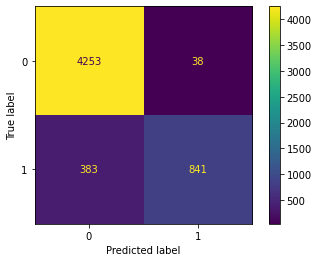

In [46]:
plot_confusion_matrix(best_rf, X_test, y_test)

In [64]:
# Check the distributions in the original and predicted Test DataSet
print(">>Predicted Value Counts: \n%s \nPredicted Normalised Value Counts: \n%s"%(np.bincount(preds), pd.Index(preds).value_counts(normalize=True)))
print(">>Original Value Counts: \n%s \nOriginal Normalised Value Counts: \n%s"%(y_test.value_counts(), y_test.value_counts(normalize=True)))
## seems like the algorithm is over predicting Positives and Under Predicting Negatives

>>Predicted Value Counts: 
[4636  879] 
Predicted Normalised Value Counts: 
0    0.840617
1    0.159383
dtype: float64
>>Original Value Counts: 
0    4291
1    1224
Name: loan_status, dtype: int64 
Original Normalised Value Counts: 
0    0.77806
1    0.22194
Name: loan_status, dtype: float64


In [66]:
# Check the total generalised errors
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      4291
           1       0.96      0.69      0.80      1224

    accuracy                           0.92      5515
   macro avg       0.94      0.84      0.88      5515
weighted avg       0.93      0.92      0.92      5515



# Threshold tuning Based on Generlised error

## Precision_Recall_curve

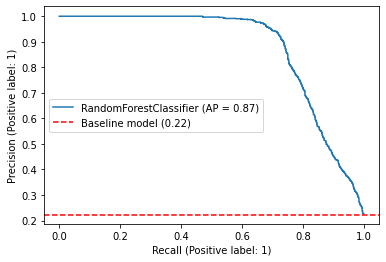

In [72]:
plot_precision_recall_curve(best_rf, X_test, y_test)
baseline = y_test.sum() / len(y_test) #fraction of positive samples in the Test data
plt.axhline(baseline, ls='--', color='r', label=f'Baseline model ({round(baseline,2)})')
plt.legend(loc='best')
#AP in the plot is trapezoidal area under the operating points.
#baseline: if you've got k training samples for category C in your training set of size n, the baseline classifier would categorise an input to C with probability k/n. A basic model must do better then the baseline.

## learning Curve  
plot of accuracy vs Training samples  
used to understand the models tendency to overfit or Underfit.  
shows how error metric value changes with respect to the traning set size during training and validation phase.  
A proper model should have both validation and training curves converge has the training set size increases.  

In [73]:
a, b, c = learning_curve(best_rf, X, y, n_jobs=-1, cv=5)

In [74]:
a

array([ 1752,  5694,  9636, 13578, 17520])

In [75]:
b

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [76]:
c

array([[0.88287671, 0.88835616, 0.89018265, 0.89041096, 0.89703196],
       [0.91369863, 0.91164384, 0.91050228, 0.91187215, 0.91187215],
       [0.9173516 , 0.91506849, 0.9196347 , 0.91712329, 0.91621005],
       [0.92009132, 0.91621005, 0.92305936, 0.92237443, 0.91803653],
       [0.92305936, 0.91575342, 0.92328767, 0.92305936, 0.92077626]])

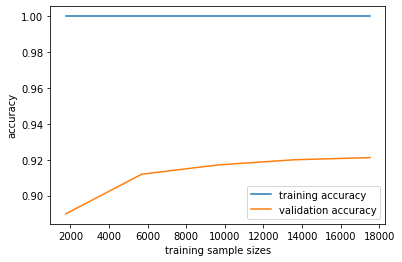

In [79]:
plt.plot(a, b.mean(axis=1), label='training accuracy')
plt.plot(a, c.mean(axis=1),  label='validation accuracy')
plt.xlabel('training sample sizes')
plt.ylabel('accuracy')
plt.legend()
# indicates overfiting and high variance
# Ovefiting occurs when: High training accuracy, low validation accuracy, Gap/Non-convergent trends between the training and validation curves=> Learnt from the noise.

# Rectification of Overfiting/High Variance  
    Add more training samples to allow the model to learn better. or Reduce the training size depending on the learning Curve  
	Make a simpler model/reduce complexity of model:  
	    try reducing number of features  
	    try increasing regularization(lambda)  
	    try pruning the decision tree.  

In [134]:
grid = {    
    RandomForestClassifier(random_state=1, n_jobs=-1, class_weight='balanced'):
    {'n_estimators':[100,200,300],
     'max_depth':[5, 9, 13],
     'min_samples_split':[4,6,8]
     #'coltf__num_pipe__impute__estimator': [LinearRegression(), RandomForestRegressor(random_state=0),KNeighborsRegressor()] #use if you are using column transformer with Impute function in it.
    }
}

In [135]:
#Empty DataFrame to store the results from the CrossValidation Matrix
full_df = pd.DataFrame()
best_algos = {}

#Iterate and fit the above specified Model and parameter dictonary
for curr_model, model_params in grid.items():
    print(">>Model: ",curr_model)
    print("parameters: ",model_params)
    print('\n')
    ##GridSearch K folds cross validation definition with current model and its parameters
    #cv_curr =  GridSearchCV(curr_model, model_params, cv=5, return_train_score=False, scoring='accuracy', verbose=0, n_jobs=-1)
    cv_curr =  RandomizedSearchCV(curr_model, model_params, cv=5, n_iter=20, return_train_score=False, scoring='accuracy', verbose=0, n_jobs=-1)
    ##fit the data to the defined grid search
    cv_curr.fit(X, y)
    
    ##Create a DataFrame out of the CrossValidation results
    all_res = pd.DataFrame(cv_curr.cv_results_)
    
    ##Create a temp Datframe with only values of 'params', 'mean_test_score' from CrossValidation results
    temp = all_res.loc[:, ['params', 'mean_test_score']]
    
    ##Get the name of the Model in use from the specified Model and parameter dictonary
    algo_name = str(curr_model).split('(')[0]
    temp['algo'] = algo_name
    
    ##Merge the temporary dataframes and results to final DataFrame and Dictonary
    full_df = pd.concat([full_df, temp])
    best_algos[algo_name]={}
    best_algos[algo_name]['best_estimator'] = cv_curr.best_estimator_
    best_algos[algo_name]['best_mean_test_score'] = cv_curr.best_score_
    print('-'*50)

>>Model:  RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=1)
parameters:  {'n_estimators': [100, 200, 300], 'max_depth': [5, 9, 13], 'min_samples_split': [4, 6, 8]}


--------------------------------------------------


In [136]:
# Check for the best Classifier Model
full_df.sort_values('mean_test_score', ascending=False)

,params,mean_test_score,algo
9,"{'n_estimators': 100, 'min_samples_split': 4, ...",0.909224,RandomForestClassifier
17,"{'n_estimators': 200, 'min_samples_split': 4, ...",0.909087,RandomForestClassifier
4,"{'n_estimators': 300, 'min_samples_split': 4, ...",0.908767,RandomForestClassifier
13,"{'n_estimators': 200, 'min_samples_split': 6, ...",0.907443,RandomForestClassifier
12,"{'n_estimators': 100, 'min_samples_split': 6, ...",0.906484,RandomForestClassifier
7,"{'n_estimators': 300, 'min_samples_split': 8, ...",0.905708,RandomForestClassifier
0,"{'n_estimators': 100, 'min_samples_split': 4, ...",0.867032,RandomForestClassifier
5,"{'n_estimators': 100, 'min_samples_split': 6, ...",0.866575,RandomForestClassifier
10,"{'n_estimators': 300, 'min_samples_split': 6, ...",0.865205,RandomForestClassifier
14,"{'n_estimators': 300, 'min_samples_split': 8, ...",0.864795,RandomForestClassifier


In [137]:
# Get the object of the Best Classifier Algorithm with the best params
be = best_algos['RandomForestClassifier']['best_estimator']
be

RandomForestClassifier(class_weight='balanced', max_depth=13,
                       min_samples_split=4, n_jobs=-1, random_state=1)

In [138]:
# Fit the best object and params to the training data
be.fit(X, y)

RandomForestClassifier(class_weight='balanced', max_depth=13,
                       min_samples_split=4, n_jobs=-1, random_state=1)

In [139]:
#fit on Training Data and Score on Training and Testing Data
be.fit(X, y)
print(">>scoring of Training Data: ",be.score(X, y))
print(">>scoring of Testing Data: ",be.score(X_test, y_test))

>>scoring of Training Data:  0.9524200913242009
>>scoring of Testing Data:  0.9097008159564823


# New learning Curve

In [140]:
a, b, c = learning_curve(be, X, y, n_jobs=-1, cv=5)

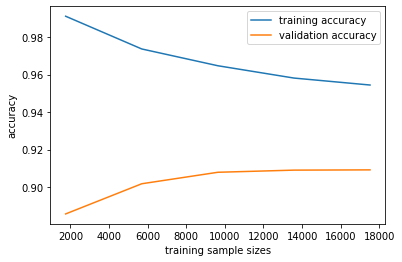

In [141]:
plt.plot(a, b.mean(axis=1), label='training accuracy')
plt.plot(a, c.mean(axis=1),  label='validation accuracy')
plt.xlabel('training sample sizes')
plt.ylabel('accuracy')
plt.legend()